# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rian Bachtiar Ashidiqy
- **Email:** bachtiar.rian@gmail.com
- **ID Dicoding:** bachtiarashidiqy

## Menentukan Pertanyaan Bisnis

- Which product categories ranked in the top and bottom 10 for both unit sales and revenue over the last 12 months?
- Which cities and which States has the largest number of orders, and what revenue did each contribute?
- How is the overall delivery performance?

## Import Library

In [1]:
!pip install gdown

import os
import gdown
import zipfile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

#### Download Data From GDrive

In [2]:
file_url = 'https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK'
output_name = 'E-commerce-public-dataset.zip'

gdown.download(file_url, output_name, quiet=False)

print("File berhasil diunduh!")

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=367273f2-bd34-4a50-995c-f73360818341
To: /content/E-commerce-public-dataset.zip
100%|██████████| 44.9M/44.9M [00:00<00:00, 89.3MB/s]


File berhasil diunduh!


In [3]:
with zipfile.ZipFile(output_name, 'r') as zip_ref:
    zip_ref.extractall('/content/ecommerce_dataset')

print("File berhasil diekstrak ke folder '/content/ecommerce_dataset'")

File berhasil diekstrak ke folder '/content/ecommerce_dataset'


#### Load Data to Dataframe

In [4]:
folder_path = "/content/ecommerce_dataset/E-Commerce Public Dataset"

file_variable_mapping = {
    "customers_dataset.csv": "customers_df",
    "orders_dataset.csv": "orders_df",
    "order_items_dataset.csv": "order_items_df",
    "order_payments_dataset.csv": "order_payments_df",
    "order_reviews_dataset.csv": "order_reviews_df",
    "products_dataset.csv": "products_df",
    "product_category_name_translation.csv": "product_translation_df",
    "sellers_dataset.csv": "sellers_df"
}

for file_name, variable_name in file_variable_mapping.items():
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    globals()[variable_name] = df

In [5]:
for variable_name in file_variable_mapping.values():
    print(f"\n\n5 baris teratas dari {variable_name}:")
    print(globals()[variable_name].head())



5 baris teratas dari customers_df:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


5 baris teratas dari orders_df:
                           order_id                       customer_id  \
0  e481f5

**Insight:**
- **Transaksi E-commerce yang Komprehensif:** Data mencakup berbagai aspek transaksi e-commerce, mulai dari pembayaran, produk, pelanggan, penjual, pesanan, item pesanan
- **Relation Key:** Terdapat kunci penghubung yang jelas antar tabel, seperti order_id, product_id, customer_id, dan seller_id, yang memungkinkan penggabungan data untuk analisis yang lebih mendalam.


| Nama Kolom                    | Deskripsi                                                                               |
|-------------------------------|-----------------------------------------------------------------------------------------|
| **customers_df**               |                                                                                         |
| customer_id                   | ID unik untuk setiap pelanggan.                                                       |
| customer_unique_id            | ID unik yang mengidentifikasi pelanggan di seluruh pesanan yang dibuat.               |
| customer_zip_code_prefix      | Kode pos pelanggan (prefix).                                                          |
| customer_city                 | Nama kota pelanggan.                                                                  |
| customer_state                | Negara bagian tempat pelanggan berada (dalam format singkatan).                       |
| **orders_df**                  |                                                                                         |
| order_id                      | ID unik untuk setiap pesanan.                                                         |
| customer_id                   | ID unik pelanggan yang terkait dengan pesanan.                                        |
| order_status                  | Status pesanan (misalnya: delivered, shipped, etc.).                                   |
| order_purchase_timestamp      | Waktu ketika pesanan dibuat.                                                          |
| order_approved_at             | Waktu ketika pesanan disetujui.                                                       |
| order_delivered_carrier_date  | Waktu ketika pesanan diserahkan kepada kurir.                                         |
| order_delivered_customer_date | Waktu ketika pesanan diterima oleh pelanggan.                                         |
| order_estimated_delivery_date | Tanggal perkiraan pengiriman pesanan.                                                |
| **order_items_df**             |                                                                                         |
| order_id                      | ID unik untuk setiap pesanan.                                                         |
| order_item_id                 | Nomor urut item dalam sebuah pesanan.                                                |
| product_id                    | ID unik produk yang dipesan.                                                          |
| seller_id                     | ID unik penjual yang menjual produk.                                                  |
| shipping_limit_date           | Batas waktu pengiriman yang dijanjikan oleh penjual.                                   |
| price                         | Harga produk.                                                                         |
| freight_value                 | Biaya pengiriman produk.                                                             |
| **order_payments_df**          |                                                                                         |
| order_id                      | ID unik untuk setiap pesanan.                                                         |
| payment_sequential            | Urutan pembayaran (berguna untuk pembayaran dengan lebih dari satu transaksi).       |
| payment_type                  | Jenis pembayaran (misalnya: credit_card, boleto, etc.).                               |
| payment_installments          | Jumlah cicilan yang digunakan dalam pembayaran.                                       |
| payment_value                 | Jumlah pembayaran dalam satu transaksi.                                              |
| **order_reviews_df**                |                                                                                         |
| review_id               | ID unik untuk setiap ulasan.                                              |
| order_id                | ID unik pesanan yang terkait dengan ulasan.                               |
| review_score            | Skor ulasan yang diberikan oleh pelanggan (misalnya: 1–5).               |
| review_comment_title    | Judul singkat dari ulasan (jika ada).                                      |
| review_comment_message  | Pesan ulasan lengkap dari pelanggan (jika ada).                           |
| review_creation_date    | Tanggal ulasan dibuat oleh pelanggan.                                      |
| review_answer_timestamp | Waktu ketika ulasan tersebut diproses atau dijawab oleh sistem.           |
| **products_df**                |                                                                                         |
| product_id                    | ID unik untuk setiap produk.                                                          |
| product_category_name         | Nama kategori produk dalam bahasa asli.                                              |
| product_name_lenght           | Panjang nama produk.                                                                  |
| product_description_lenght    | Panjang deskripsi produk.                                                             |
| product_photos_qty            | Jumlah foto produk.                                                                   |
| product_weight_g              | Berat produk dalam gram.                                                             |
| product_length_cm             | Panjang produk dalam cm.                                                             |
| product_height_cm             | Tinggi produk dalam cm.                                                              |
| product_width_cm              | Lebar produk dalam cm.                                                               |
| **product_translation_df**     |                                                                                         |
| product_category_name         | Nama kategori produk dalam bahasa asli.                                              |
| product_category_name_english | Nama kategori produk dalam bahasa Inggris.                                           |
| **sellers_df**                 |                                                                                         |
| seller_id                     | ID unik untuk setiap penjual.                                                        |
| seller_zip_code_prefix        | Kode pos penjual (prefix).                                                           |
| seller_city                   | Kota tempat penjual berada.                                                          |
| seller_state                  | Negara bagian tempat penjual berada (dalam format singkatan).                        |


#### Merging Data

In [6]:
df= pd.merge(customers_df, orders_df, on="customer_id", how='inner')
df= df.merge(order_reviews_df, on="order_id", how='inner')
df= df.merge(order_items_df, on="order_id", how='inner')
df= df.merge(products_df, on="product_id", how='inner')
df= df.merge(order_payments_df, on="order_id", how='inner')
df= df.merge(sellers_df, on='seller_id', how='inner')
df= df.merge(product_translation_df, on='product_category_name', how='inner')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,15.0,40.0,1,credit_card,8,335.48,88303,itajai,SC,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,52.0,17.0,1,credit_card,7,157.73,8577,itaquaquecetuba,SP,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,51.0,28.0,1,credit_card,1,173.30,8577,itaquaquecetuba,SP,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,15.0,35.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort


### Assessing Data

#### Assesing Customers Table

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

In [8]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


### Cleaning Data

#### Handling Missing Values

##### Drop All Missing Values in datetime columns

In [10]:
df.dropna(subset= ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [11]:
df.reset_index(inplace= True, drop= True)

##### Rename column

In [12]:
df.rename(columns={'product_category_name_english': 'product_name'}, inplace=True)

##### Convert Datetime features from Object to Datetime

In [13]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'])

##### Extract duration of estimated shipping from purchasing date untill estimated delivery date

In [14]:
df['estimated_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

##### Extract duration of shipping from purchasing date until delivered to customer date

In [15]:
df['arrival_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

##### Shipping status from Carrier to Customer

In [16]:
df['arrival_status'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

df['arrival_status'] = df['arrival_status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')

##### Show statistics of new Features

In [17]:
df['arrival_days'].describe()

,arrival_days
count,113194.000000
mean,11.976412
std,9.362060
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,208.000000


##### Remove Outliers in: features ( More than 60 days )

In [18]:
outlier_indices = df[(df.arrival_days > 60)].index

df.drop(outlier_indices, inplace= True)
df.reset_index(inplace= True, drop= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112888 entries, 0 to 112887
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112888 non-null  object        
 1   customer_unique_id             112888 non-null  object        
 2   customer_zip_code_prefix       112888 non-null  int64         
 3   customer_city                  112888 non-null  object        
 4   customer_state                 112888 non-null  object        
 5   order_id                       112888 non-null  object        
 6   order_status                   112888 non-null  object        
 7   order_purchase_timestamp       112888 non-null  datetime64[ns]
 8   order_approved_at              112888 non-null  object        
 9   order_delivered_carrier_date   112888 non-null  datetime64[ns]
 10  order_delivered_customer_date  112888 non-null  datetime64[ns]
 11  

## Visualization & Explanatory Analysis

### Which product categories ranked in the top and bottom 10 for both unit sales and revenue over the last 12 months?

In [20]:
best_selling_product = df.groupby('product_name')\
                                .agg(num_orders = ('order_id','nunique'),
                                    revenue = ('payment_value', 'sum'))\
                                .sort_values('num_orders', ascending=False)

top_10 = best_selling_product.head(10)
bottom_10 = best_selling_product.tail(10).sort_values('num_orders', ascending=True)

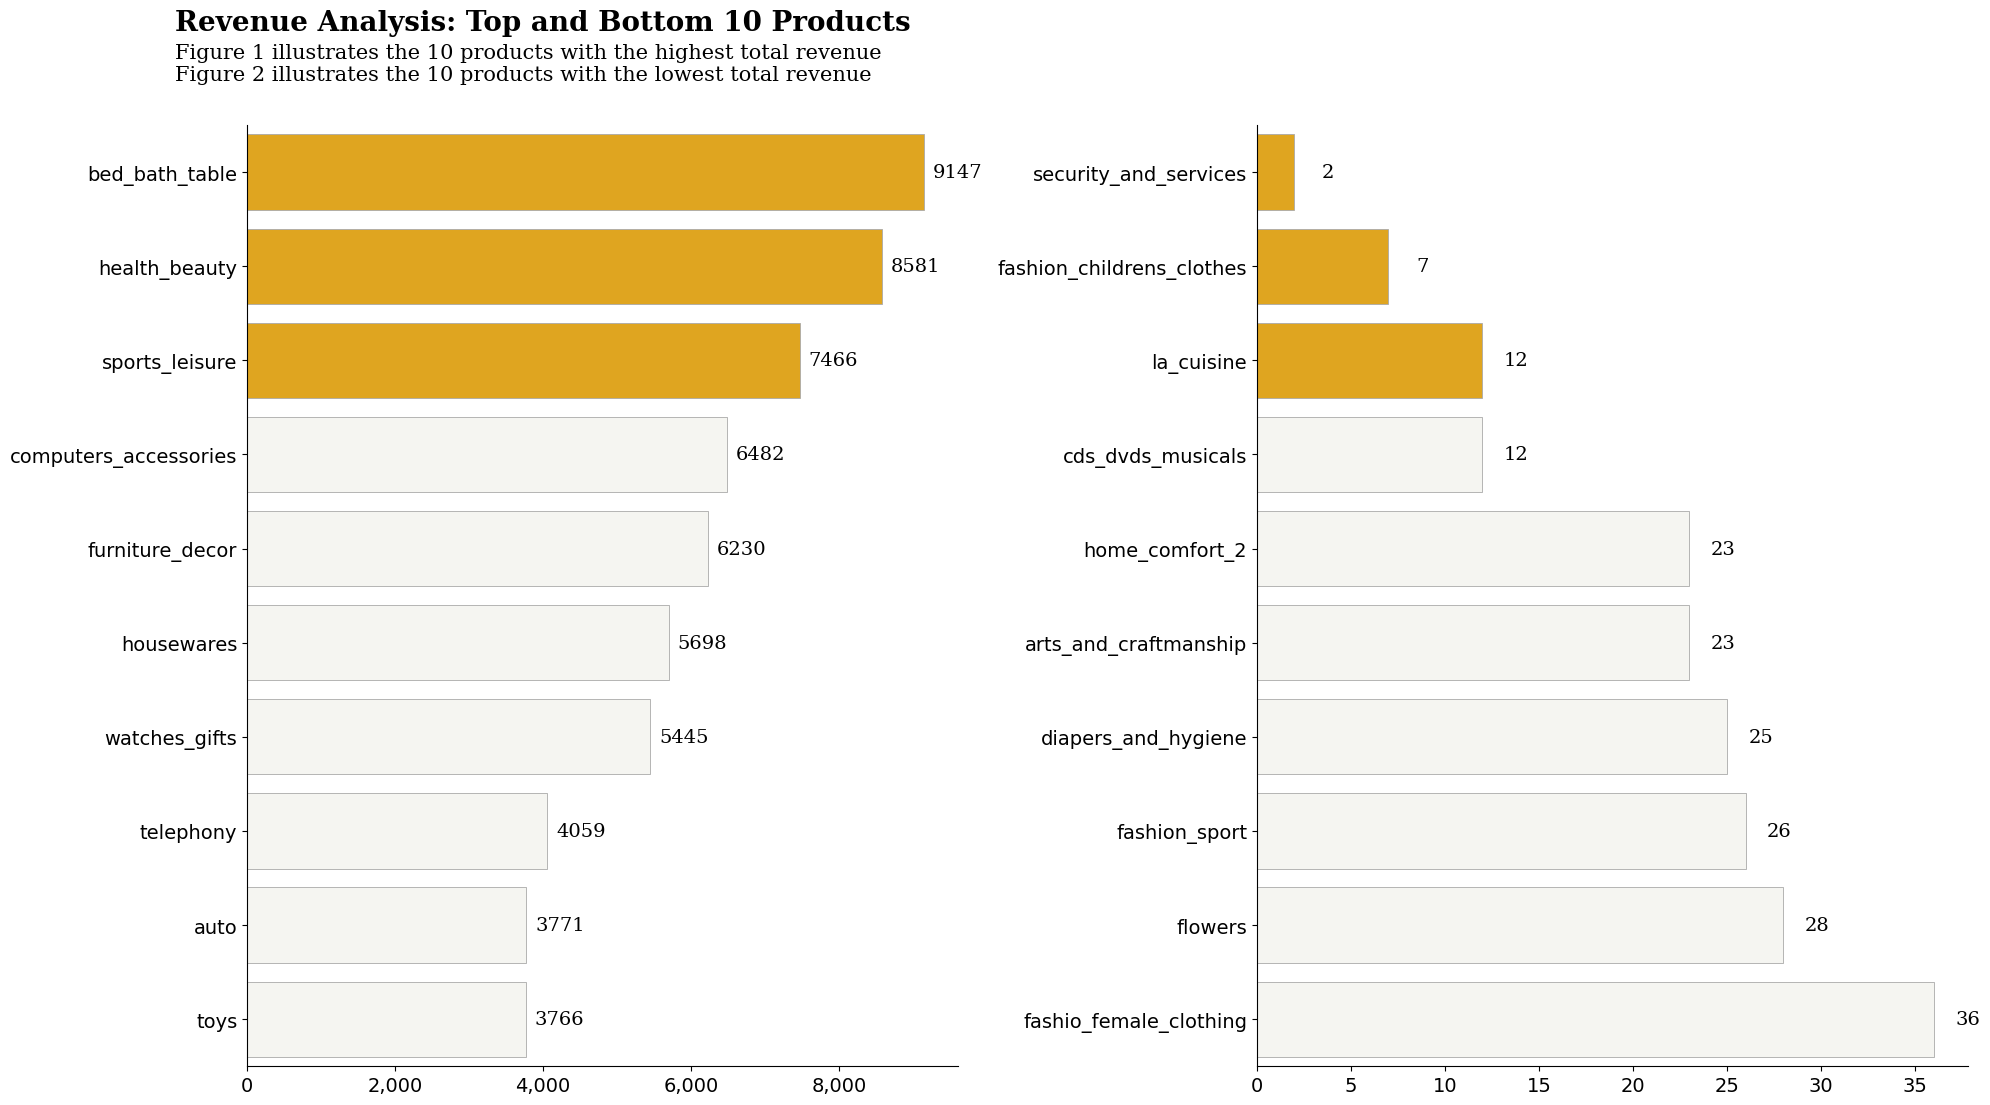

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

color_map = ['#f5f5f1' for _ in range(10)]
color_map[:3] = ['#FFB200', '#FFB200', '#FFB200']

sns.barplot(y=top_10.index, x='num_orders', data=top_10, palette=color_map, edgecolor='darkgray',
            linewidth=0.6, ax=ax[0], orient='h')
sns.barplot(y=bottom_10.index, x='num_orders', data=bottom_10, palette=color_map, edgecolor='darkgray',
            linewidth=0.6, ax=ax[1], orient='h')

for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax[0].xaxis.set_major_formatter(tick)
ax[1].xaxis.set_major_formatter(tick)

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

fig.text(0.09, 1.08, 'Revenue Analysis: Top and Bottom 10 Products', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03,
         'Figure 1 illustrates the 10 products with the highest total revenue\nFigure 2 illustrates the 10 products with the lowest total revenue',
         fontsize=15, fontweight='light', fontfamily='serif')

highest1 = top_10['num_orders'].max() * 0.05
highest2 = bottom_10['num_orders'].max() * 0.05

for i, val in enumerate(top_10['num_orders']):
    ax[0].annotate(f"{val}",
                   xy=(val + highest1, i),
                   va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

for i, val in enumerate(bottom_10['num_orders']):
    ax[1].annotate(f"{val}",
                   xy=(val + highest2, i),
                   va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

In [22]:
best_revenue_product = df.groupby('product_name')\
                                .agg(num_orders = ('order_id','nunique'),
                                    revenue = ('payment_value', 'sum'))\
                                .sort_values('revenue', ascending=False)

top_10_rev = best_revenue_product.head(10)
bot_10_rev = best_revenue_product.tail(10).sort_values('revenue', ascending=True)

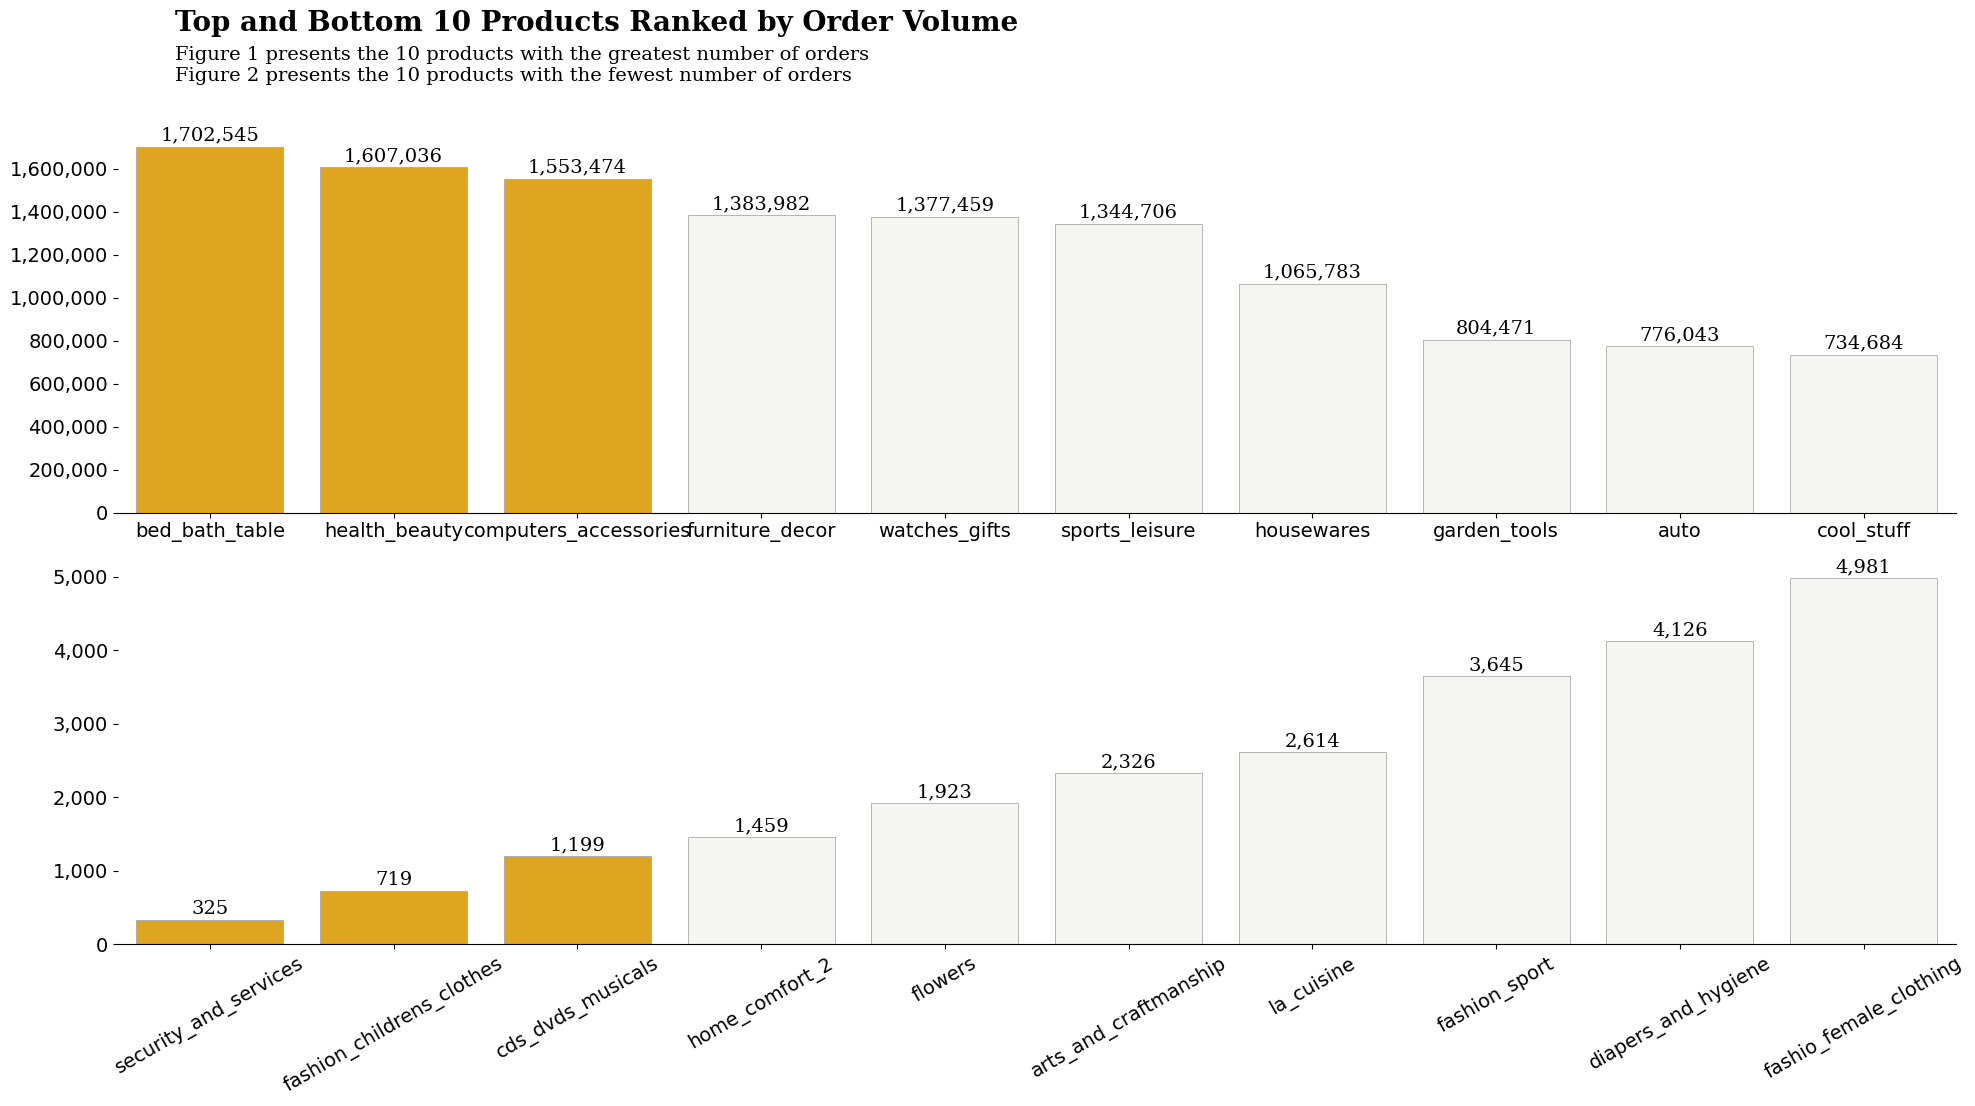

In [23]:
fig, ax = plt.subplots(2,1 , figsize=(20, 10))

color_map = ['#f5f5f1' for _ in range(10)]
color_map[:3] = ['#FFB200', '#FFB200', '#FFB200']

sns.barplot(x=top_10_rev.index, y='revenue', data=top_10_rev, palette=color_map, edgecolor='darkgray',
              linewidth=0.6, ax=ax[0])
sns.barplot(x=bot_10_rev.index, y='revenue', data=bot_10_rev, palette=color_map, edgecolor='darkgray',
              linewidth=0.6, ax=ax[1])

for s in ['top', 'left', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax[0].yaxis.set_major_formatter(tick)
ax[1].yaxis.set_major_formatter(tick)

def format_annotation(val):
    return fmt.format(x=val)

highest1 = top_10_rev['revenue'].max() * 0.03
highest2 = bot_10_rev['revenue'].max() * 0.03

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

fig.text(0.09, 1.08, 'Top and Bottom 10 Products Ranked by Order Volume', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03,
         'Figure 1 presents the 10 products with the greatest number of orders\nFigure 2 presents the 10 products with the fewest number of orders',
         fontsize=14, fontweight='light', fontfamily='serif')

for i, val in enumerate(top_10_rev['revenue']):
    ax[0].annotate(format_annotation(val),
                xy=(i, val + highest1),
                va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

for i, val in enumerate(bot_10_rev['revenue']):
    ax[1].annotate(format_annotation(val),
                xy=(i, val + highest2),
                va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='x', labelrotation=30)

plt.tight_layout()
plt.show()

### Which cities and which States has the largest number of orders, and what revenue did each contribute?

In [24]:
top10_city = df.groupby('customer_city')\
                                .agg(num_orders = ('order_id','nunique'),
                                    revenue = ('payment_value', 'sum'))\
                                .sort_values('revenue', ascending=False).head(10)

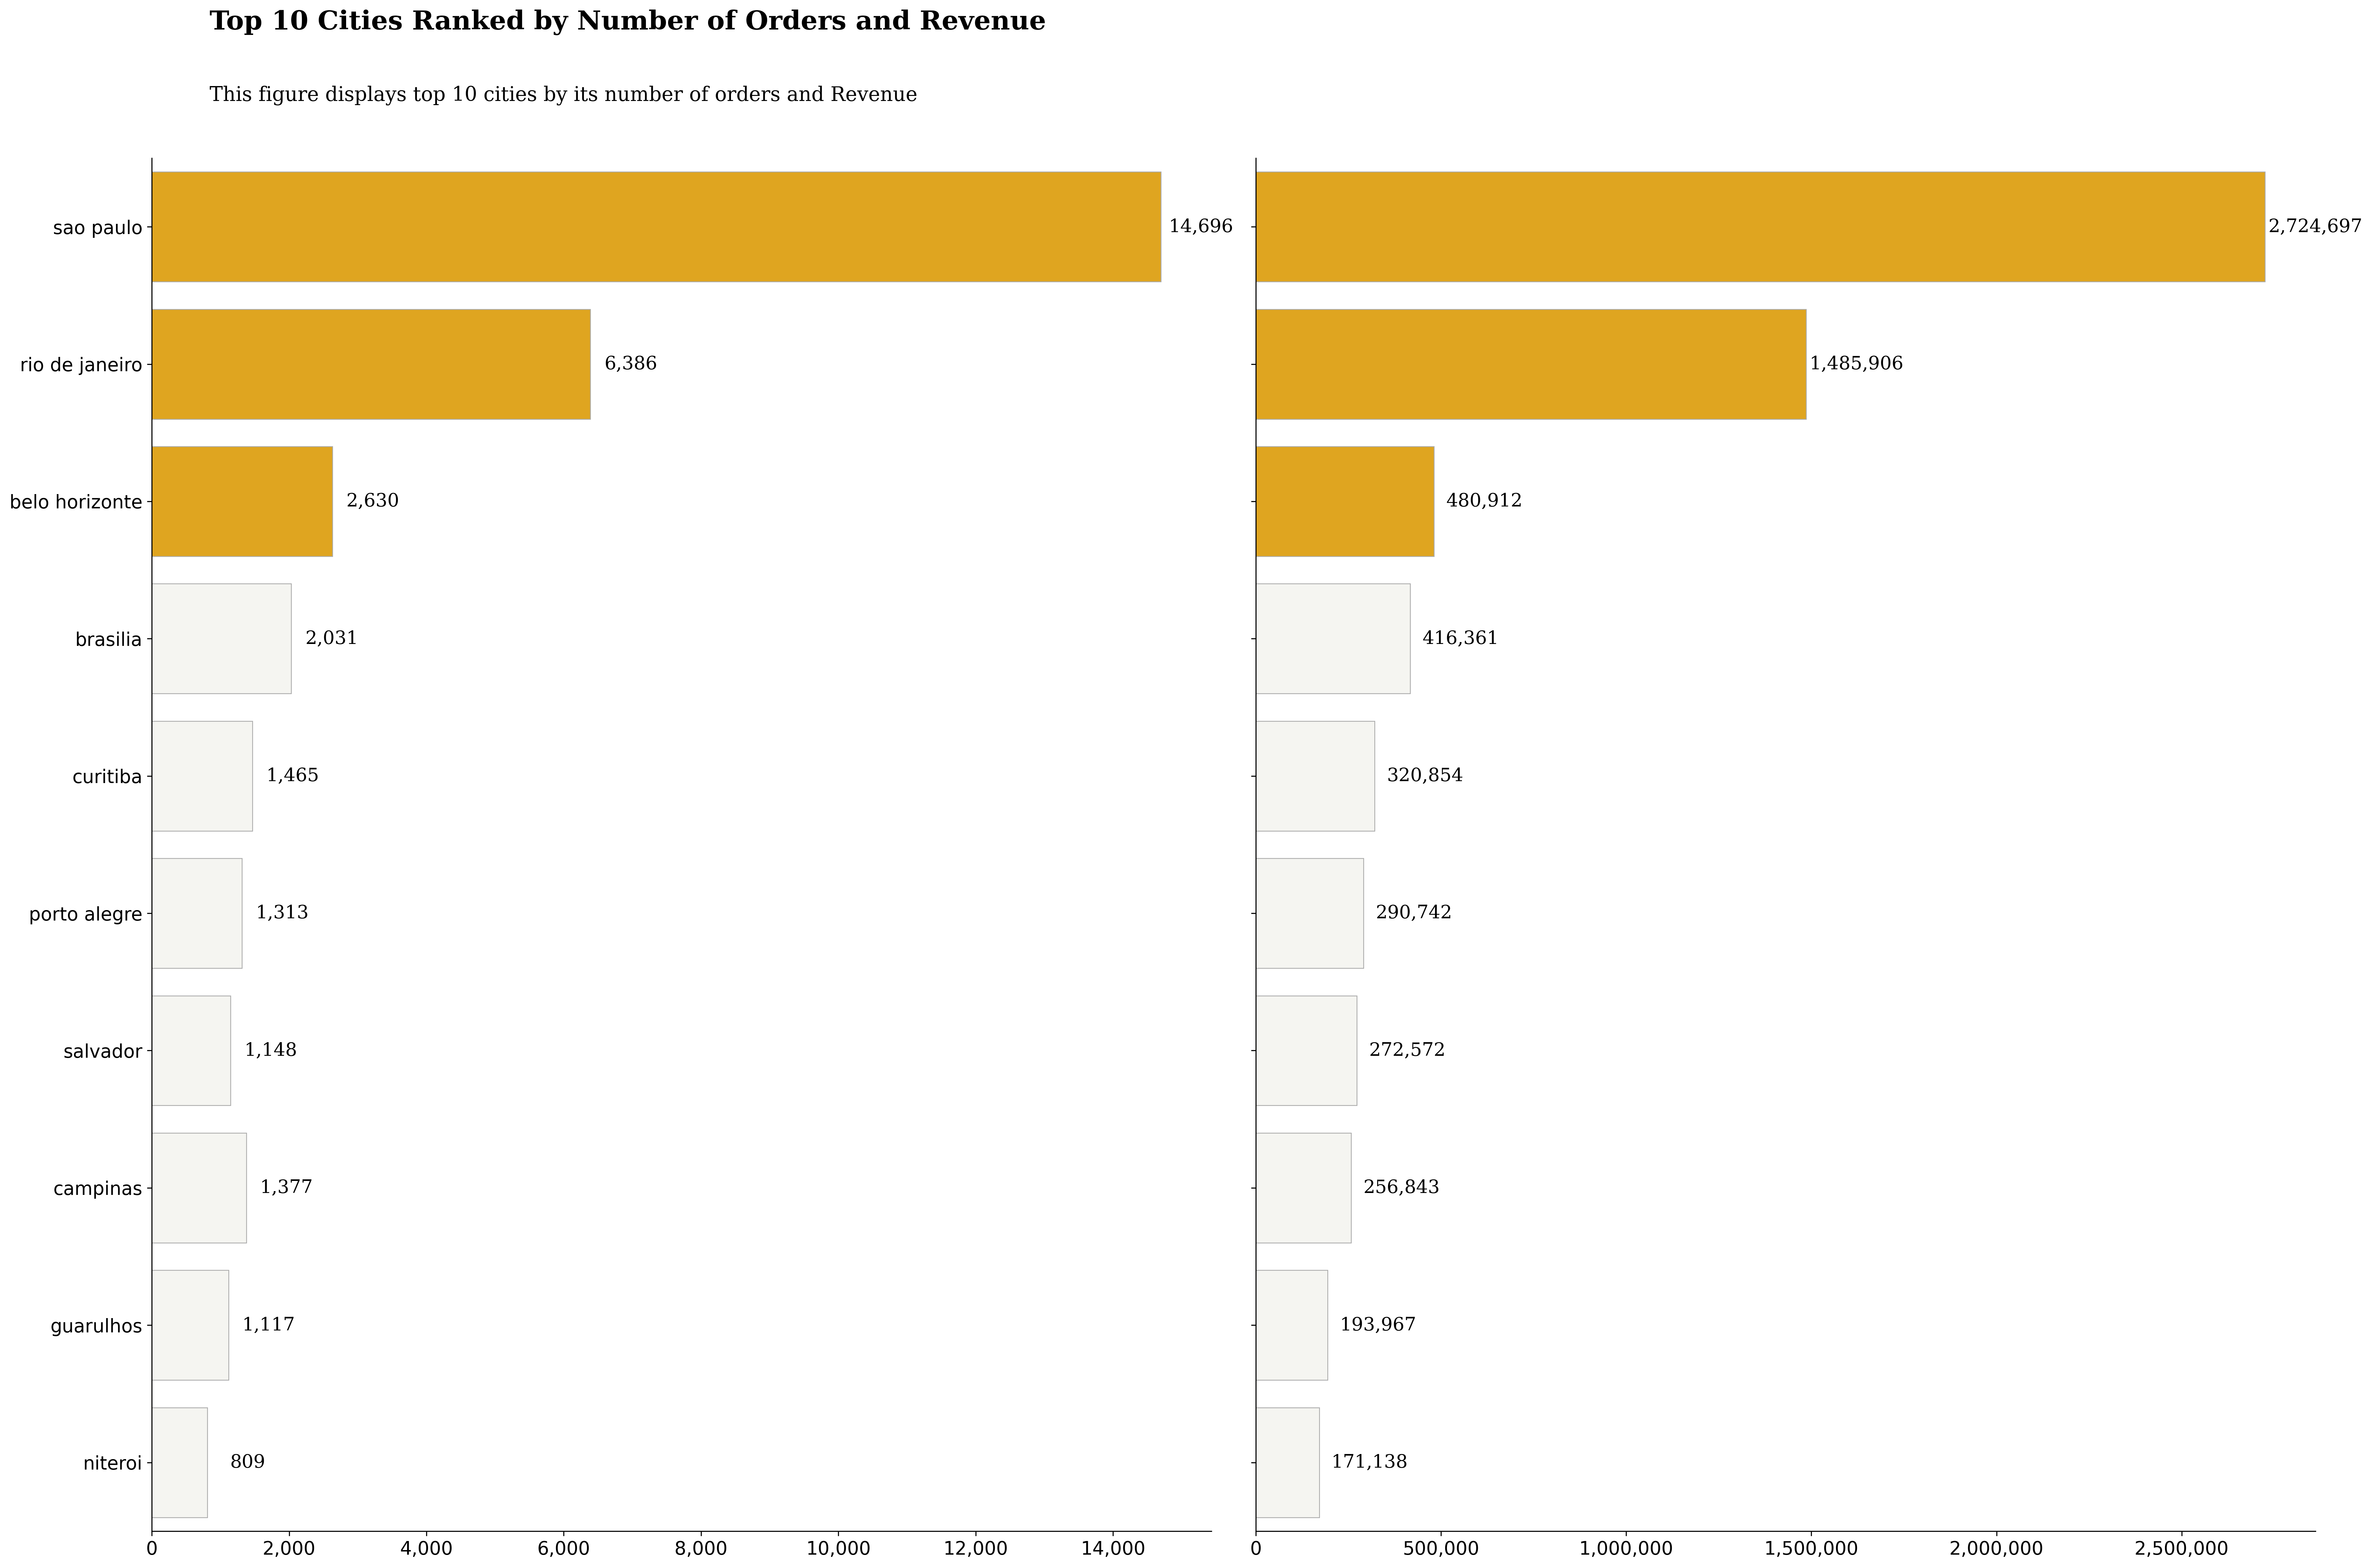

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(25, 15), dpi=300, sharey=True)

color_map1 = ['#f5f5f1' for _ in range(10)]
color_map1[:3] = ['#FFB200', '#FFB200', '#FFB200']

sns.barplot(y=top10_city.index, x='num_orders', data=top10_city, palette=color_map1, edgecolor='darkgrey',
            linewidth=0.6, ax=ax[0], orient='h')
sns.barplot(y=top10_city.index, x='revenue', data=top10_city, palette=color_map1, edgecolor='darkgrey',
            linewidth=0.6, ax=ax[1], orient='h')

for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax[0].xaxis.set_major_formatter(tick)
ax[1].xaxis.set_major_formatter(tick)

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

fig.text(0.09, 1.08, 'Top 10 Cities Ranked by Number of Orders and Revenue', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03,
         'This figure displays top 10 cities by its number of orders and Revenue',
         fontsize=15, fontweight='light', fontfamily='serif')


highest1 = top10_city['num_orders'].max() * 0.04
highest2 = top10_city['revenue'].max() * 0.05

for i, val in enumerate(top10_city['num_orders']):
    ax[0].annotate(format_annotation(val),
                   xy=(val + highest1, i),
                   va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

for i, val in enumerate(top10_city['revenue']):
    ax[1].annotate(format_annotation(val),
                   xy=(val + highest2, i),
                   va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

In [26]:
top10_state = df.groupby('customer_state')\
                                .agg(num_orders = ('order_id','nunique'),
                                    revenue = ('payment_value', 'sum'))\
                                .sort_values('revenue', ascending=False).head(10)

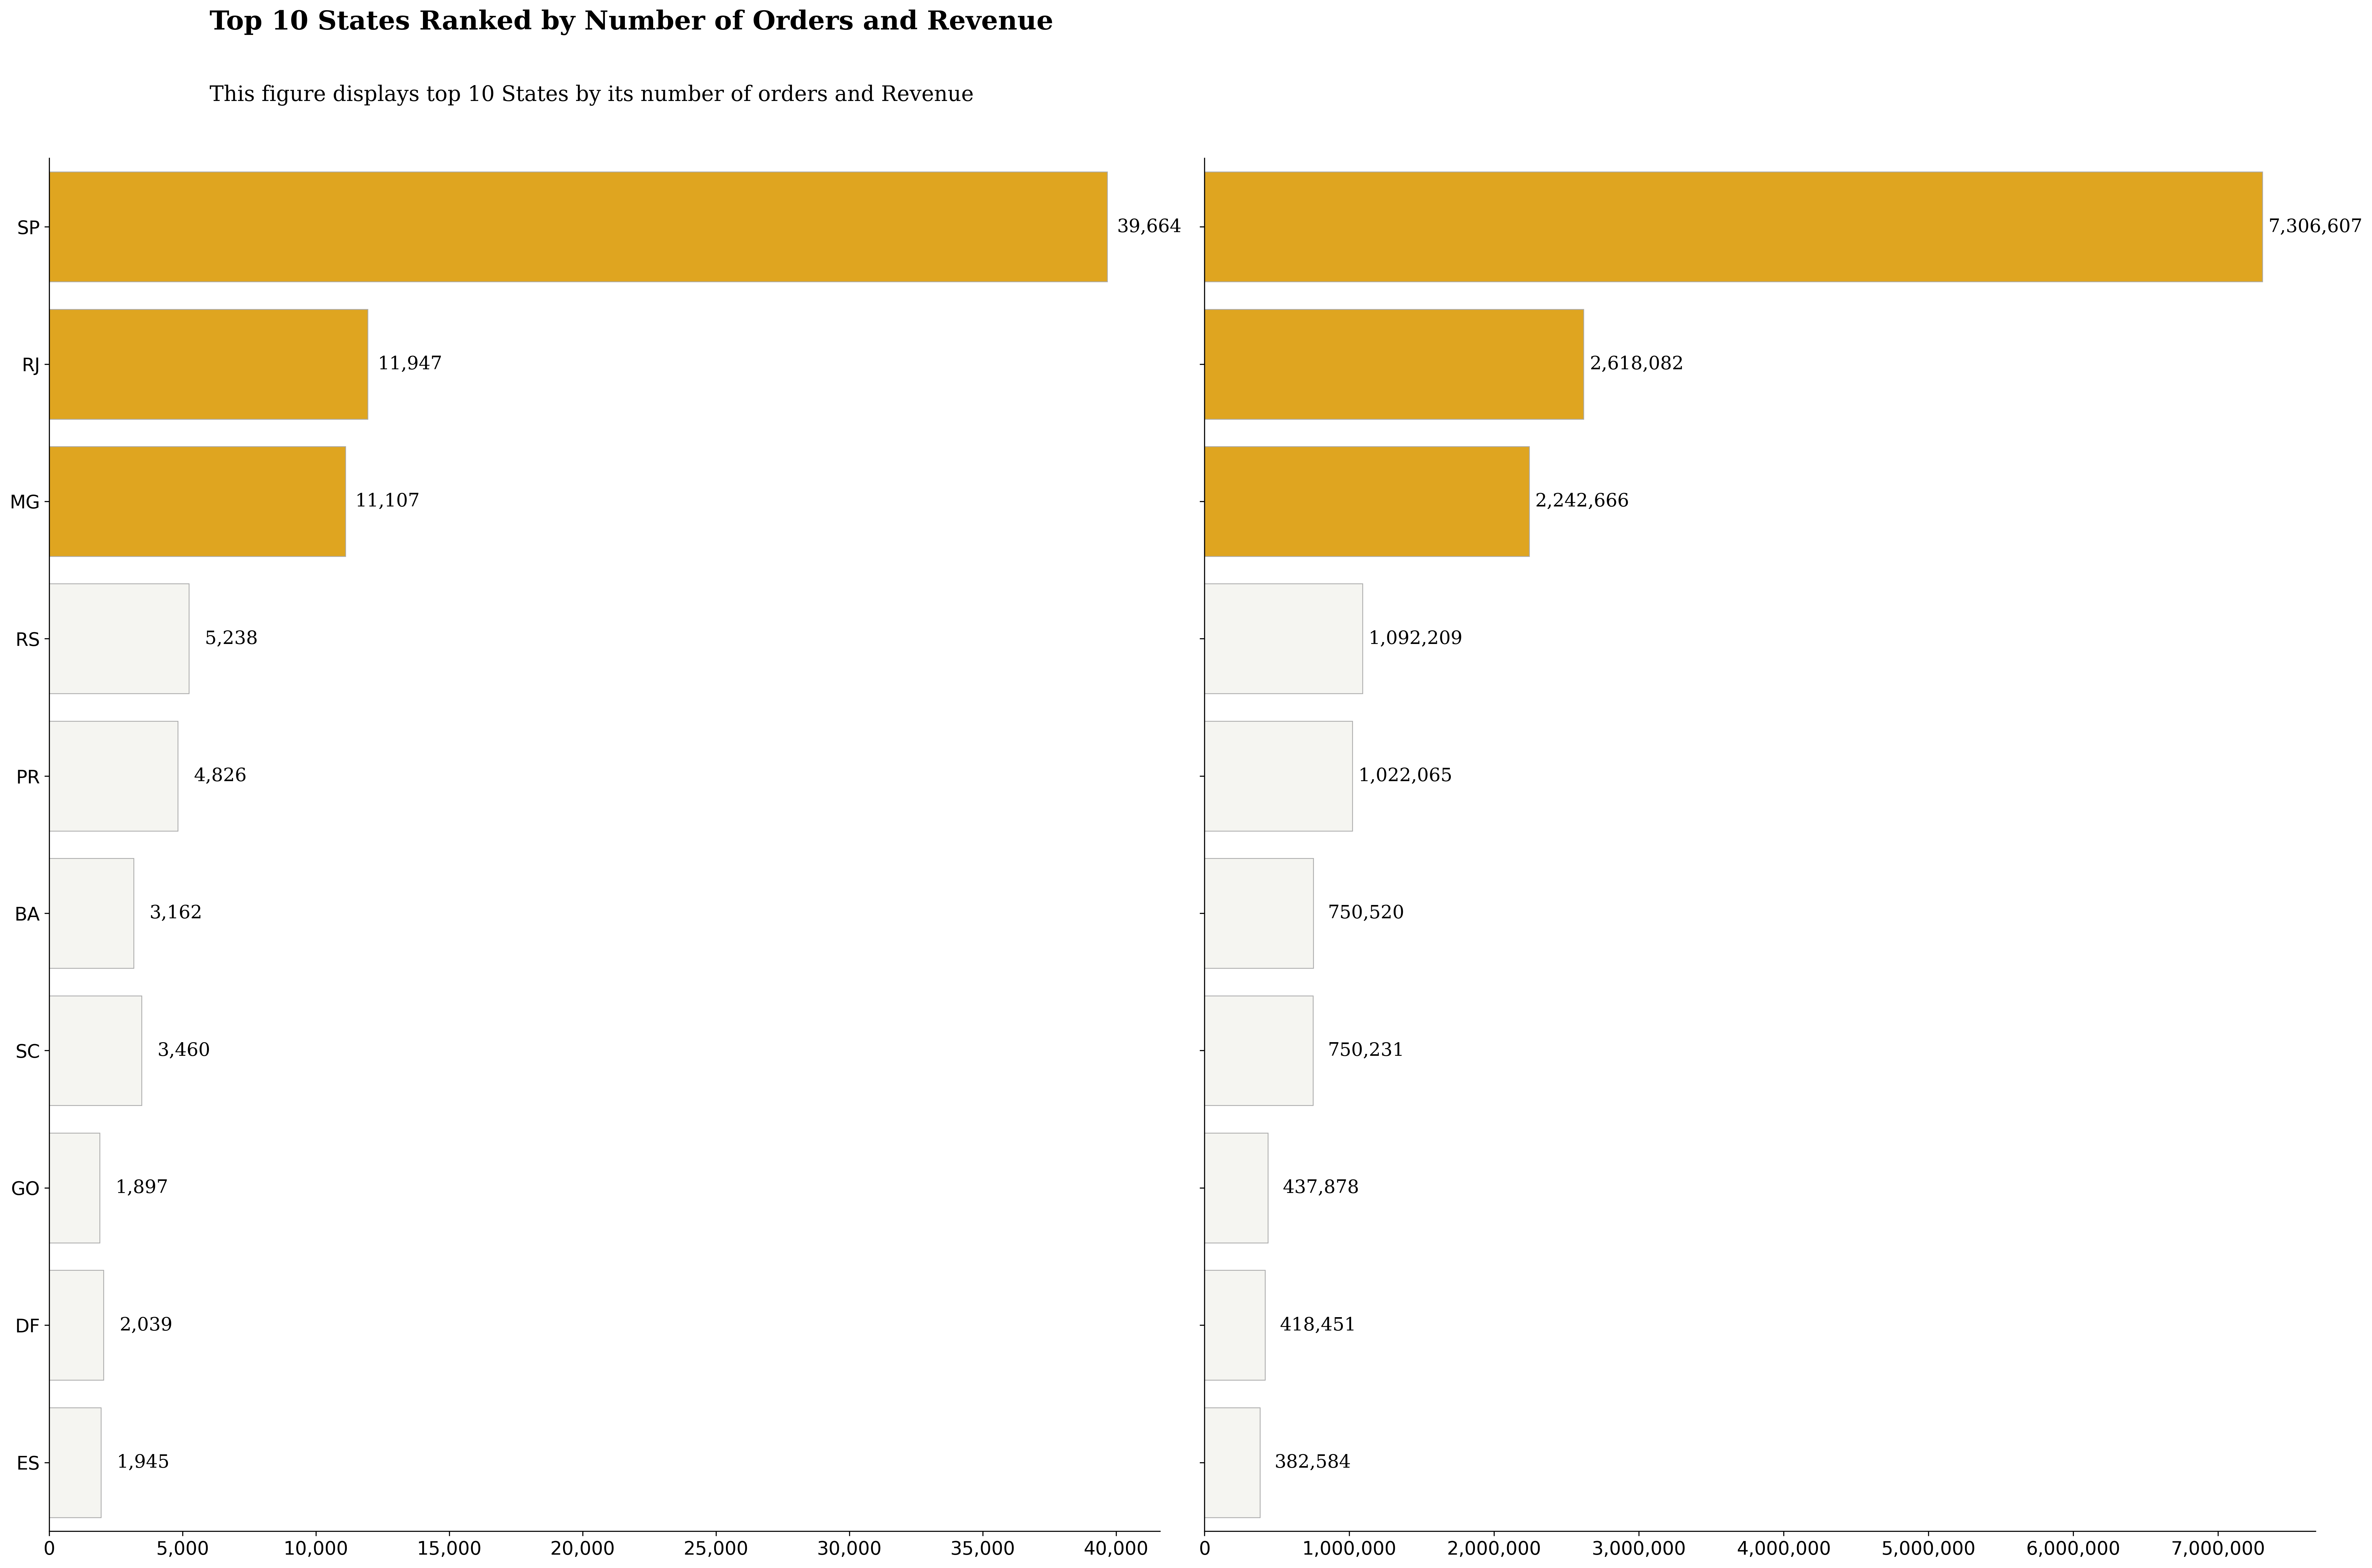

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(25, 15), dpi=300, sharey=True)

color_map2 = ['#f5f5f1' for _ in range(10)]
color_map2[:3] = ['#FFB200', '#FFB200', '#FFB200']

sns.barplot(y=top10_state.index, x='num_orders', data=top10_state, palette=color_map2, edgecolor='darkgrey',
            linewidth=0.6, ax=ax[0], orient='h')
sns.barplot(y=top10_state.index, x='revenue', data=top10_state, palette=color_map2, edgecolor='darkgrey',
            linewidth=0.6, ax=ax[1], orient='h')

for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax[0].xaxis.set_major_formatter(tick)
ax[1].xaxis.set_major_formatter(tick)

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

fig.text(0.09, 1.08, 'Top 10 States Ranked by Number of Orders and Revenue', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03,
         'This figure displays top 10 States by its number of orders and Revenue',
         fontsize=16, fontweight='light', fontfamily='serif')

highest1 = top10_state['num_orders'].max() * 0.04
highest2 = top10_state['revenue'].max() * 0.05

for i, val in enumerate(top10_state['num_orders']):
    ax[0].annotate(format_annotation(val),
                   xy=(val + highest1, i),
                   va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

for i, val in enumerate(top10_state['revenue']):
    ax[1].annotate(format_annotation(val),
                   xy=(val + highest2, i),
                   va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

### How is the overall delivery performance?

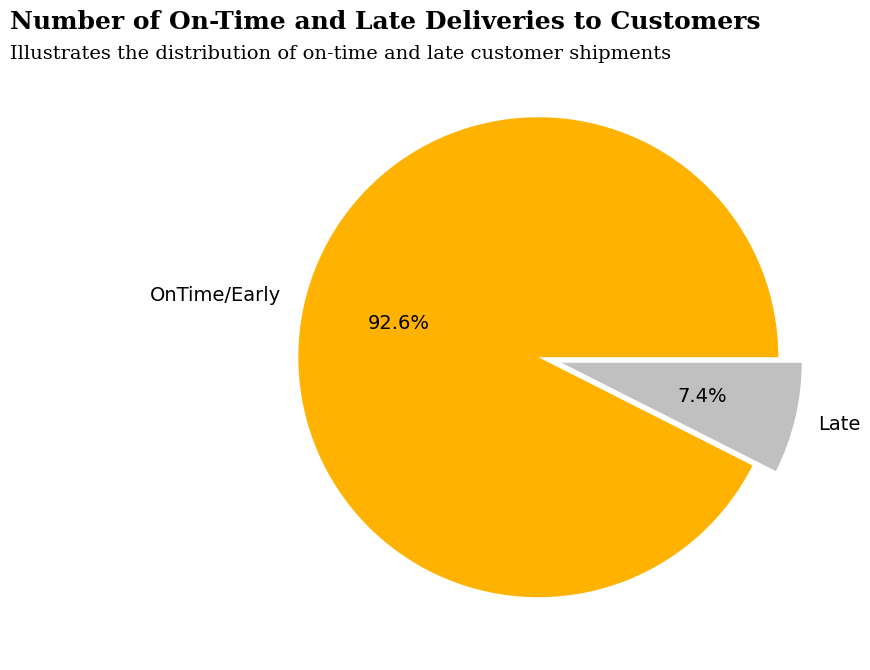

In [28]:
fig, ax = plt.subplots(figsize=(12, 7))
Values = df.arrival_status.value_counts().values
Labels = df.arrival_status.value_counts().index
ax.pie(Values, labels=Labels, autopct='%1.1f%%', explode=(0.05, 0.05), colors=('#FFB200', '#C0C0C0'), textprops={'fontsize': 14})

fig.text(0.05, 0.95, 'Number of On-Time and Late Deliveries to Customers', fontsize=18, fontweight='bold', fontfamily='serif', verticalalignment='top')
fig.text(0.05, 0.90, 'Illustrates the distribution of on-time and late customer shipments', fontsize=14, fontweight='light', fontfamily='serif', verticalalignment='top')

plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()

**Insights:**

* The data reveals a strong concentration of sales in specific product categories and geographic locations.
* Delivery performance is generally excellent, contributing to a positive customer experience.
* Opportunities exist to optimize low-performing product categories and expand into new markets.
* Analyzing the revenue and order volume discrepancies can provide useful information about product pricing strategies.

## RFM Analysis


### Recency

In [29]:
# Extract data for recency

df_user = pd.DataFrame(df ['customer_unique_id'])
df_user.columns = ['customer_unique_id']
df_max_purchase = df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
df_max_purchase.rename(columns = {'order_purchase_timestamp' :'maxPurchaseDate'}, inplace = True)

df_max_purchase['maxPurchaseDate'] = pd.to_datetime(df_max_purchase['maxPurchaseDate'])
df_max_purchase['recency'] = (df_max_purchase['maxPurchaseDate'].max() - df_max_purchase['maxPurchaseDate']).dt.days
df_user = pd.merge(df_user, df_max_purchase[['customer_unique_id','recency']], on ='customer_unique_id')
df_user.recency.describe()

,recency
count,112888.000000
mean,236.664676
std,152.560072
min,0.000000
25%,113.000000
50%,217.000000
75%,345.000000
max,694.000000


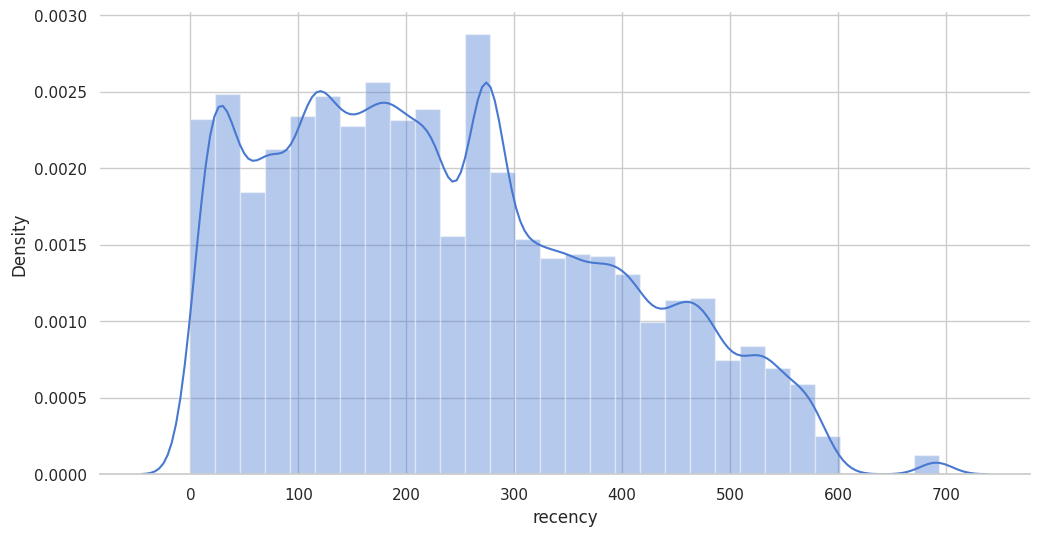

In [30]:
sns.set (palette='muted', color_codes=True, style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(df_user['recency'], bins=30)
plt.show()

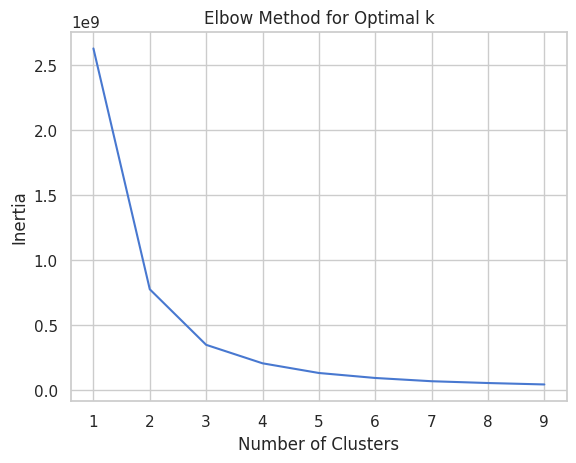

In [31]:
# elbow point : k=5

point = {}

df_recency = df_user[['recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_recency)
    df_recency['cluster_' + str(k)] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.plot(list(point.keys()), list(point.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [32]:
# cluster analysis with 5 clusters

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user [['recency']])
df_user['recencycluster'] = kmeans.predict(df_user[['recency']])

def order_cluster (cluster_field_name, target_field_name,df, ascending) :
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()

    df_new = df_new.sort_values (by=target_field_name,ascending=ascending).reset_index(drop=True)

    df_new['index'] = df_new.index
    df_final =pd.merge(df,df_new[[cluster_field_name, 'index']],on=cluster_field_name)

    df_final = df_final.drop([cluster_field_name] ,axis=1)

    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_user = order_cluster('recencycluster', 'recency' ,df_user, False)
df_user.groupby('recencycluster') ['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recencycluster,,,,,,,,
0,13242.0,513.506872,48.723488,449.0,474.0,507.0,543.0,694.0
1,18142.0,383.414563,34.754950,326.0,352.0,383.0,412.0,448.0
2,26191.0,266.326181,30.986518,213.0,237.0,270.0,288.0,325.0
3,30014.0,156.914473,31.777314,105.0,128.0,157.0,184.0,212.0
4,25299.0,50.431124,29.242330,0.0,24.0,47.0,76.0,104.0


### Frequency

In [33]:
df_frequency =df.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_frequency.rename (columns = {'order_purchase_timestamp' :'frequency'}, inplace = True)

df_user = pd.merge(df_user, df_frequency, on='customer_unique_id')
df_user.frequency.describe()

,frequency
count,112888.000000
mean,1.814754
std,2.853159
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,75.000000


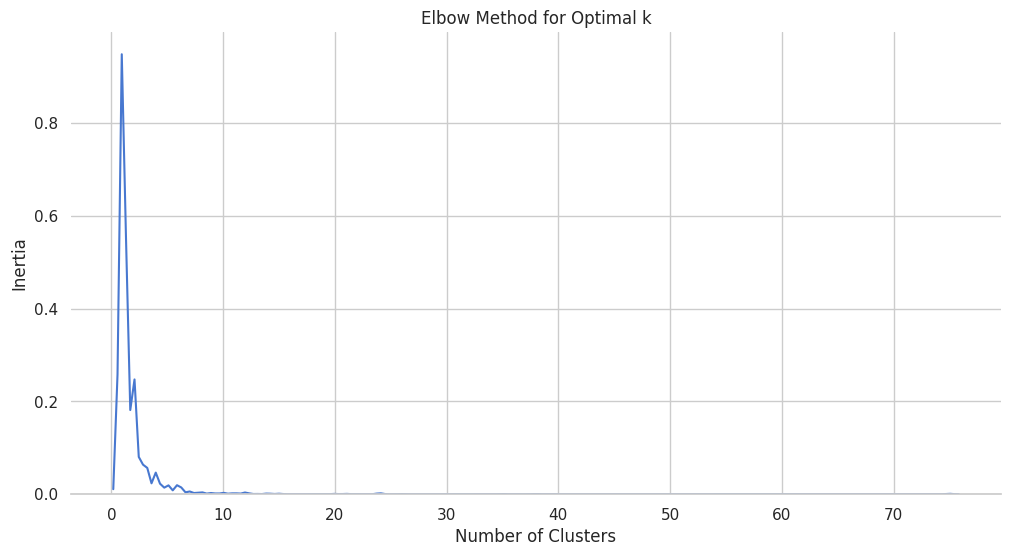

In [34]:
sns.set(palette='muted', color_codes=True, style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(df_user['frequency'], hist=False)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

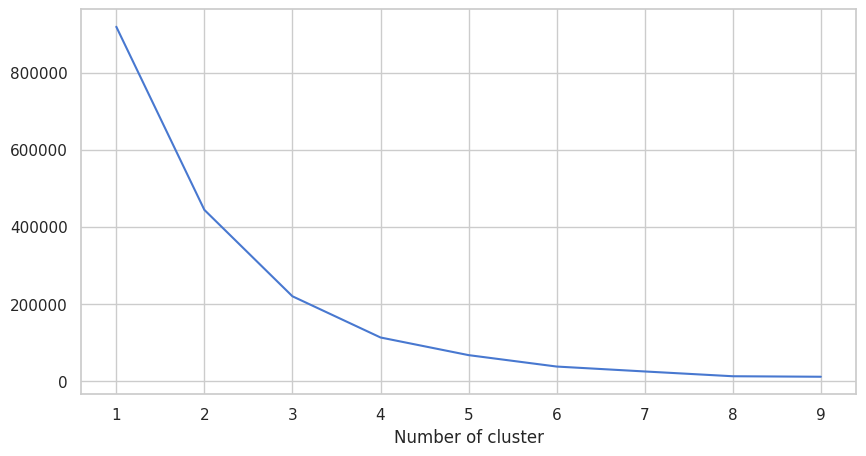

In [35]:
point={}
df_frequency = df_user[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_frequency)
    df_frequency["clusters"] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize=(10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel("Number of cluster")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['frequency']])
df_user['frequencycluster'] =kmeans.predict(df_user[['frequency']])
df_user =order_cluster('frequencycluster', 'frequency', df_user, True)
df_user.groupby('frequencycluster') ['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequencycluster,,,,,,,,
0,103301.0,1.305980,0.569970,1.0,1.0,1.0,1.0,3.0
1,8779.0,5.605992,2.085333,4.0,4.0,5.0,6.0,12.0
2,660.0,18.857576,4.371693,13.0,14.0,20.0,24.0,26.0
3,73.0,36.561644,1.509105,35.0,35.0,38.0,38.0,38.0
4,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


### Monetary

In [37]:
df_revenue =df.groupby('customer_unique_id').payment_value.sum().reset_index()
df_user = pd.merge(df_user, df_revenue, on = 'customer_unique_id')
df_user.head()

,customer_unique_id,recency,recencycluster,frequency,frequencycluster,payment_value
0,861eff4711a542e4b93843c6dd7febb0,469,0,1,0,146.87
1,290c77bc529b7ac935b93aa66c333dc3,228,2,1,0,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,101,4,1,0,157.73
3,259dac757896d24d7702b9acbbff3f3c,168,3,1,0,173.30
4,345ecd01c38d18a9036ed96c73b8d066,31,4,1,0,252.25


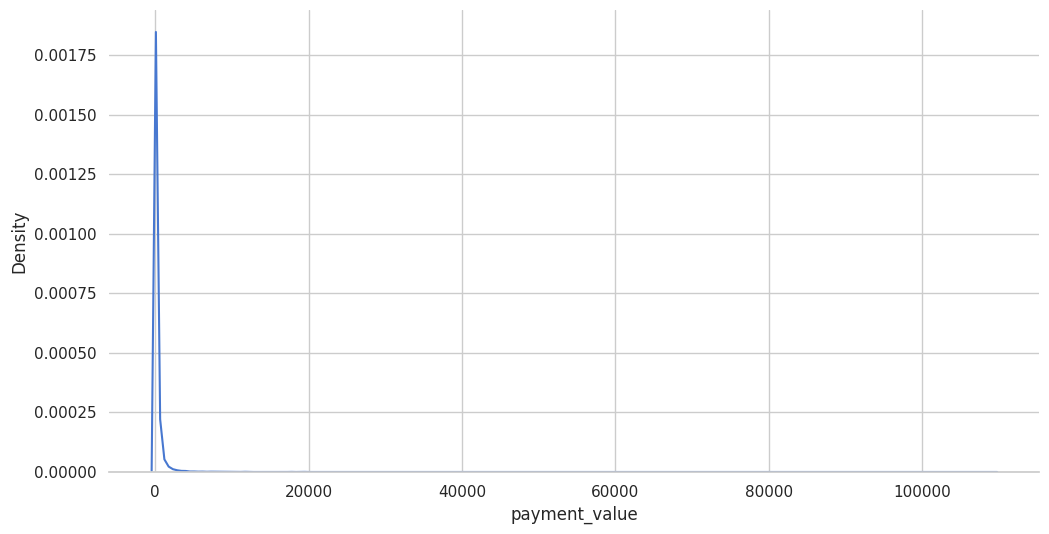

In [38]:
sns.set(palette='muted', color_codes=True, style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(df_user['payment_value'], hist=False)
plt. show()

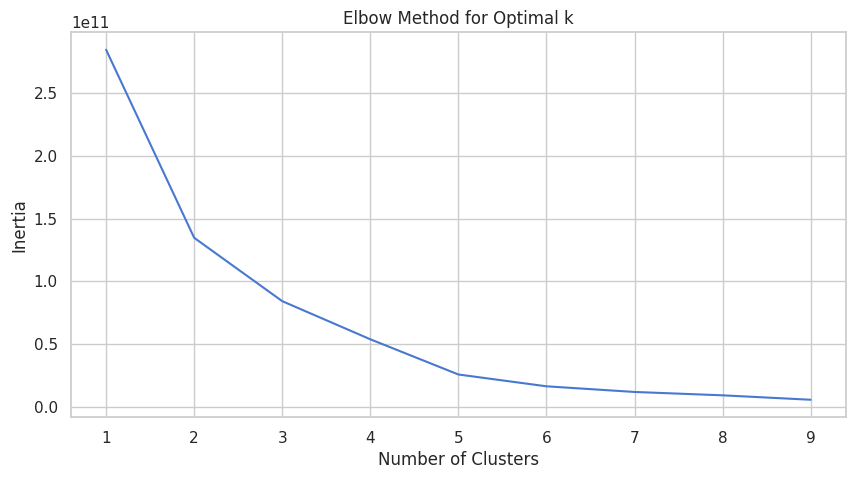

In [39]:
point={}
df_revenue = df_user[['payment_value']]

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_revenue)
    df_revenue["clusters"] = kmeans.labels_
    point[k] = kmeans.inertia_

plt.figure(figsize=(10, 5))
plt.plot(list(point.keys()), list(point.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user [['payment_value']])

df_user['revenuecluster'] =kmeans.predict (df_user[['payment_value']])

df_user = order_cluster('revenuecluster','payment_value', df_user, True)
df_user.groupby ('revenuecluster') ['payment_value'].describe()

,count,mean,std,min,25%,50%,75%,max
revenuecluster,,,,,,,,
0,109467.0,226.406249,269.873090,9.59,68.96,128.95,255.21,1749.75
1,3021.0,3293.798567,1590.460044,1755.21,2090.44,2740.62,3957.12,8425.44
2,313.0,13668.102620,4050.558731,8511.75,9759.75,12300.00,17671.00,22346.60
3,79.0,32460.543165,7333.137005,25051.89,27935.46,29099.52,40268.62,44048.00
4,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


### Customer Scoring

In [41]:
df_user['overallscore'] = df_user['recencycluster'] + df_user['frequencycluster'] + df_user['revenuecluster']

agg_df = df_user.groupby('overallscore').agg({'recency': 'mean', 'frequency': 'mean', 'payment_value': 'mean'})
print(agg_df)

df_user['segment'] = 'low value'
df_user.loc[df_user['overallscore'] > 3, 'segment'] = 'mid_value'
df_user.loc[df_user['overallscore'] > 6, 'segment'] = 'high_value'

                 recency  frequency  payment_value
overallscore                                      
0             512.771884   1.278473     189.341454
1             390.934603   1.529524     232.642091
2             274.935366   1.577895     256.222622
3             166.453679   1.628240     270.852337
4              63.873041   1.795519     345.539831
5              98.817063   8.013946    1974.944664
6              98.343789   9.946048    6062.626600
7              67.976744   8.976744   13961.179302
8             148.974359  16.435897   35208.626410
9              21.000000  24.000000   27935.460000


**Insight:**

*   The "overallscore" table provides a clear picture of customer value.
*   Clusters with higher frequency and monetary values (e.g., clusters 6, 7, 8, 9, 10) represent high-value customers
* Customers within cluster 0 have the lowest average revenue.
* The revenue data shows a very large standard deviation and a very large max value, indicating that there are a small number of customers that have made very large purchases.



## Conclusion

### 1. Which product categories ranked in the top and bottom 10 for both unit sales and revenue over the last 12 months?
Over the past 12 months, the product categories 'bed_bath_table,' 'health_beauty,' 'computers_accessories,' 'furniture_decor,' 'watches_gifts,' 'sports_leisure,' and 'housewares' have consistently ranked in the top 10 for unit sales (number of orders) and total revenue. In contrast, 'security_and_services,' 'fashion_childrens_clothes,' 'cds_dvds_musicals,' 'home_comfort_2,' 'arts_and_craftmanship,' 'fashion_sport,' 'diapers_and_hygiene,' and 'fashio_female_clothing' consistently ranked in the bottom 10 for both metrics. These findings highlight the core product categories that drive business success and identify areas of significantly below-average performance that require strategic attention.

---


### 2. Which cities and which States has the largest number of orders, and what revenue did each contribute?
The cities of 'sao paulo' and 'rio de janeiro' exhibit the highest order volumes and revenue contribution, with 'sao paulo' significantly leading in both metrics. Similarly, the state of 'SP' (São Paulo) dominates in both order volume and revenue, followed by 'RJ' (Rio de Janeiro) and 'MG' (Minas Gerais). These findings highlight a strong concentration of sales in these key urban centers and states, indicating their importance as primary markets.

---



### 3. How is the overall delivery performance?
The data indicates a high level of delivery efficiency, as 92.6% of customer deliveries are completed on-time or even ahead of schedule. This suggests effective logistics and positive customer experiences related to delivery. While this demonstrates a generally successful delivery system, the remaining 7.4% of late deliveries represent a potential area for optimization to further enhance customer satisfaction.